## Project Overview:
###### In this project, I worked with the Sakila database to extract insights using SQL queries. After retrieving the data, I used Pandas and visualization libraries (Matplotlib and Seaborn) for exploratory data analysis (EDA) and to create meaningful visualizations.
###### The goal of this project is to practice real-world data extraction, analysis, and visualization skills to draw business-relevant conclusions.

##  Table of Contents:
1. SQL Queries and Data Retrieval

2. Moving to Pandas

3. Data Analysis and Visualization

4. Final Observations

In [ ]:
import mysql.connector
import pandas as pd

In [2]:
# Connect to MySQL server
conn = mysql.connector.connect(
    host="localhost", 
    user="***",  # MySQL username
    password="***",  # MySQL password
    database="sakila"  # Sakila database
)

In [3]:
# Function to execute query and return a DataFrame
def execute_query(query):
    cursor.execute(query)  # Execute the SQL query
    results = cursor.fetchall()  # Fetch all results
    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])
    return df

In [4]:
cursor = conn.cursor()

In [5]:
query = 'SHOW TABLES;'
df1 = execute_query(query)

df1

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


### Movie Insights

#### Top 10 most rented films

In [6]:
query = 'SELECT * FROM film;'
df = execute_query(query)

df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


In [7]:
query = '''SELECT film_id, title, rental_rate
FROM film
ORDER BY rental_rate ASC
LIMIT 10;'''

df2 = execute_query(query)
df2

,film_id,title,rental_rate
0,1,ACADEMY DINOSAUR,0.99
1,17,ALONE TRIP,0.99
2,27,ANONYMOUS HUMAN,0.99
3,23,ANACONDA CONFESSIONS,0.99
4,19,AMADEUS HOLY,0.99
5,26,ANNIE IDENTITY,0.99
6,14,ALICE FANTASIA,0.99
7,18,ALTER VICTORY,0.99
8,12,ALASKA PHANTOM,0.99
9,11,ALAMO VIDEOTAPE,0.99


#### Movies available in most stores.

In [8]:
query = 'SELECT * FROM inventory;'
df = execute_query(query)

# Display the DataFrame
df.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [9]:
query = '''SELECT F.title, COUNT(DISTINCT I.store_id) AS store_count
FROM film F
JOIN inventory I ON F.film_id = I.film_id
GROUP BY F.title
ORDER BY store_count DESC, f.title
LIMIT 20'''
df3 = execute_query(query)
df3

,title,store_count
0,ACADEMY DINOSAUR,2
1,AFFAIR PREJUDICE,2
2,AGENT TRUMAN,2
3,AIRPLANE SIERRA,2
4,ALABAMA DEVIL,2
5,ALADDIN CALENDAR,2
6,ALAMO VIDEOTAPE,2
7,ALASKA PHANTOM,2
8,ALIEN CENTER,2
9,ALLEY EVOLUTION,2


#### Count of movies by category.

In [10]:
query = 'SELECT * FROM category;'
df = execute_query(query)
df.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [11]:
query = 'SELECT * FROM film_category;'
df = execute_query(query)
df.head()

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09
1,2,11,2006-02-15 05:07:09
2,3,6,2006-02-15 05:07:09
3,4,11,2006-02-15 05:07:09
4,5,8,2006-02-15 05:07:09


In [49]:
query = '''SELECT c.name category_name, COUNT(fc.film_id) AS movies_count
FROM category c
JOIN film_category fc ON c.category_id = fc.category_id
GROUP BY c.name
ORDER BY movies_count DESC'''
df4 = execute_query(query)
df4

,category_name,movies_count
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Games,61
9,Sci-Fi,61


#### Average rental duration per category

In [13]:
query = 'SELECT * FROM category;'
df = execute_query(query)
df.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [14]:
query = 'SELECT * FROM film_category;'
df = execute_query(query)
df.head()

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09
1,2,11,2006-02-15 05:07:09
2,3,6,2006-02-15 05:07:09
3,4,11,2006-02-15 05:07:09
4,5,8,2006-02-15 05:07:09


In [15]:
query = 'SELECT * FROM film;'
df = execute_query(query)
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


In [16]:
query = '''SELECT C.name AS Category, AVG(F.rental_duration) AS avg_rental_duration
FROM category C
JOIN 
film_category fc ON C.category_id = fc.category_id
JOIN
film F ON fc.film_id = F.film_id
GROUP BY
Category
ORDER BY 
avg_rental_duration DESC;'''
df5 = execute_query(query)
df5

,Category,avg_rental_duration
0,Travel,5.3509
1,Music,5.2353
2,Family,5.1739
3,Foreign,5.1096
4,Drama,5.0806
5,Classics,5.0702
6,Games,5.0656
7,Children,5.0333
8,Action,4.9531
9,Comedy,4.9310


### Revenue Analysis

#### Total revenue generated by each film

In [17]:
query = 'SELECT * FROM film;'
df = execute_query(query)
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


In [18]:
query = 'SELECT * FROM payment;'
df = execute_query(query)
df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [19]:
query = 'SELECT * FROM rental;'
df = execute_query(query)
df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [20]:
query = 'SELECT * FROM inventory;'
df = execute_query(query)
df.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [21]:
query = '''SELECT F.title Film, SUM(P.amount) Total_Revenue
FROM payment P
JOIN
rental R ON P.rental_id = R.rental_id
JOIN
inventory I ON R.inventory_id = I.inventory_id
JOIN 
film F ON I.film_id = F.film_id
GROUP BY
Film
ORDER BY 
Total_Revenue DESC
LIMIT 20;
'''
df6 = execute_query(query)
df6

,Film,Total_Revenue
0,TELEGRAPH VOYAGE,231.73
1,WIFE TURN,223.69
2,ZORRO ARK,214.69
3,GOODFELLAS SALUTE,209.69
4,SATURDAY LAMBS,204.72
5,TITANS JERK,201.71
6,TORQUE BOUND,198.72
7,HARRY IDAHO,195.70
8,INNOCENT USUAL,191.74
9,HUSTLER PARTY,190.78


#### Revenue by customers (Top 5 spenders)

In [22]:
query = 'SELECT * FROM customer;'
df = execute_query(query)
df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [23]:
query = '''SELECT CONCAT(C.first_name,' ',C.last_name) Spenders, SUM(P.amount) Revenue
FROM customer C
JOIN 
payment P ON C.customer_id = P.customer_id
GROUP BY 
Spenders
ORDER BY 
Revenue DESC
LIMIT 5;
'''
df7 = execute_query(query)
df7

,Spenders,Revenue
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61


#### Monthly revenue trend

In [24]:
query = '''SELECT DATE_FORMAT(payment_date, '%Y-%M') AS Month, SUM(amount) AS Total_Revenue
FROM payment P
GROUP BY Month
ORDER BY Month;'''
df8 = execute_query(query)
df8

,Month,Total_Revenue
0,2005-August,24072.13
1,2005-July,28373.89
2,2005-June,9631.88
3,2005-May,4824.43
4,2006-February,514.18


#### Revenue By Store

In [25]:
query = 'SELECT * FROM store;'
df = execute_query(query)
df

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2006-02-15 04:57:12
1,2,2,2,2006-02-15 04:57:12


In [26]:
query = 'SELECT * FROM staff;'
df = execute_query(query)
df

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2006-02-15 03:57:16
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,None,2006-02-15 03:57:16


In [27]:
query = '''SELECT 
    S.store_id,
    SUM(P.amount) AS total_revenue
FROM payment P
JOIN staff ST ON P.staff_id = ST.staff_id
JOIN store S ON ST.store_id = S.store_id
GROUP BY S.store_id
ORDER BY store_id ASC;'''

df9 = execute_query(query)
df9

,store_id,total_revenue
0,1,33489.47
1,2,33927.04


### Customer Behavior

#### Number of rentals per customer.

In [28]:
query = '''SELECT * FROM customer;'''
df = execute_query(query)
df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [29]:
query = '''SELECT CONCAT(C.first_name,' ',C.last_name) AS Customers, COUNT(P.rental_id) AS NO_Of_Rentals
FROM customer C
JOIN 
payment P On C.customer_id = P.customer_id
GROUP BY Customers
ORDER BY NO_Of_Rentals DESC
LIMIT 10;'''
df10 = execute_query(query)
df10

,Customers,NO_Of_Rentals
0,ELEANOR HUNT,46
1,KARL SEAL,45
2,CLARA SHAW,42
3,MARCIA DEAN,42
4,TAMMY SANDERS,41
5,SUE PETERS,40
6,WESLEY BULL,40
7,MARION SNYDER,39
8,RHONDA KENNEDY,39
9,TIM CARY,39


#### Customers who haven’t rented anything in the last 3 months.

In [30]:
query = '''SELECT C.first_name, C.last_name, C.email
FROM customer C
LEFT JOIN rental R ON C.customer_id = R.customer_id
LEFT JOIN payment P ON R.rental_id = P.rental_id
WHERE R.rental_date <= CURDATE() - INTERVAL 3 MONTH
OR R.rental_date IS NULL
GROUP BY C.customer_id
ORDER BY C.first_name, C.last_name;'''
df11 = execute_query(query)
df11.head()

,first_name,last_name,email
0,AARON,SELBY,AARON.SELBY@sakilacustomer.org
1,ADAM,GOOCH,ADAM.GOOCH@sakilacustomer.org
2,ADRIAN,CLARY,ADRIAN.CLARY@sakilacustomer.org
3,AGNES,BISHOP,AGNES.BISHOP@sakilacustomer.org
4,ALAN,KAHN,ALAN.KAHN@sakilacustomer.org


#### Active vs Inactive customers

In [63]:
query = '''SELECT 
CASE WHEN active = 1 THEN 'Active' ELSE 'Inactive' END AS Status,
COUNT(*) AS Customer_Count
FROM customer
GROUP BY active;'''
df12 = execute_query(query)
df12

,Status,Customer_Count
0,Active,584
1,Inactive,15


#### Top 10 Active Customers

In [32]:
query = '''SELECT CONCAT(c.first_name,' ',c.last_name) AS customers_name, COUNT(r.rental_id) AS total_rentals
FROM customer c
JOIN rental r ON c.customer_id = r.customer_id
GROUP BY c.customer_id
ORDER BY total_rentals DESC
LIMIT 10;'''
df13 = execute_query(query)
df13

,customers_name,total_rentals
0,ELEANOR HUNT,46
1,KARL SEAL,45
2,CLARA SHAW,42
3,MARCIA DEAN,42
4,TAMMY SANDERS,41
5,SUE PETERS,40
6,WESLEY BULL,40
7,MARION SNYDER,39
8,RHONDA KENNEDY,39
9,TIM CARY,39


### Geographic Analysis

#### Number of customers per country.

In [33]:
query = 'SELECT * FROM country;'
df = execute_query(query)
df.head()

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 04:44:00
1,2,Algeria,2006-02-15 04:44:00
2,3,American Samoa,2006-02-15 04:44:00
3,4,Angola,2006-02-15 04:44:00
4,5,Anguilla,2006-02-15 04:44:00


In [34]:
query = 'SELECT * FROM customer;'
df = execute_query(query)
df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [35]:
query = 'SELECT * FROM city;'
df = execute_query(query)
df.head()

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2006-02-15 04:45:25
1,2,Abha,82,2006-02-15 04:45:25
2,3,Abu Dhabi,101,2006-02-15 04:45:25
3,4,Acua,60,2006-02-15 04:45:25
4,5,Adana,97,2006-02-15 04:45:25


In [36]:
query = 'SELECT * FROM address;'
df = execute_query(query)
df.head()

,address_id,address,address2,district,city_id,postal_code,phone,location,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00>\n2]c4\...,2014-09-25 22:30:27
1,2,28 MySQL Boulevard,None,QLD,576,,,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x8e\x10...,2014-09-25 22:30:09
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xcd\xc4...,2014-09-25 22:30:27
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00[\r\xe44...,2014-09-25 22:30:09
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00(\xd17\x...,2014-09-25 22:31:53


In [37]:
query = '''SELECT ct.country AS Country, COUNT(c.customer_id) AS number_of_customers
FROM customer c
JOIN address a ON c.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
JOIN country ct ON ci.country_id = ct.country_id
GROUP BY Country
ORDER BY number_of_customers DESC
LIMIT 10;'''
df14 = execute_query(query)
df14

,Country,number_of_customers
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
5,Brazil,28
6,Russian Federation,28
7,Philippines,20
8,Turkey,15
9,Indonesia,14


#### Total revenue per country.

In [38]:
query = 'SELECT * FROM payment;'
df = execute_query(query)
df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [39]:
query = '''SELECT ct.country AS Country, SUM(P.amount) AS total_rvenue 
FROM payment P
JOIN customer c ON p.customer_id = c.customer_id
JOIN address a ON c.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
JOIN country ct ON ci.country_id = ct.country_id
GROUP BY Country
ORDER BY total_rvenue DESC
LIMIT 10;
'''
df15 = execute_query(query)
df15

,Country,total_rvenue
0,India,6630.27
1,China,5802.73
2,United States,4110.32
3,Japan,3471.74
4,Mexico,3307.04
5,Brazil,3200.52
6,Russian Federation,3045.87
7,Philippines,2381.32
8,Turkey,1662.12
9,Nigeria,1511.48


#### Top cities by rentals.

In [40]:
query = 'SELECT * FROM rental;'
df = execute_query(query)
df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [41]:
query = '''
SELECT ci.city AS City, COUNT(r.rental_id) AS Total_Rentals
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN store s ON i.store_id = s.store_id
JOIN address a ON s.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
GROUP BY City
ORDER BY Total_Rentals DESC
LIMIT 10;
'''
df16 = execute_query(query)
df16

,City,Total_Rentals
0,Woodridge,8121
1,Lethbridge,7923


### Time-Based Trends

#### Number of rentals per month.

In [42]:
query = '''
SELECT DATE_FORMAT(rental_date, '%Y-%m') AS Month, COUNT(*) AS Rental_Count
FROM rental
GROUP BY Month
ORDER BY Month;
'''
df17 = execute_query(query)
df17.head()

,Month,Rental_Count
0,2005-05,1156
1,2005-06,2311
2,2005-07,6709
3,2005-08,5686
4,2006-02,182


#### Peak rental hours (using rental datetime).

In [43]:
query = '''
SELECT HOUR(rental_date) AS Rental_Hour, COUNT(*) AS Rental_Count
FROM rental
GROUP BY Rental_Hour
ORDER BY Rental_Count DESC;
'''
df18 = execute_query(query)
df18.head()

,Rental_Hour,Rental_Count
0,15,887
1,8,696
2,0,694
3,18,688
4,3,684


#### Seasonal trends in rentals.

In [44]:
query = '''
SELECT
  CASE
    WHEN MONTH(rental_date) IN (12, 1, 2) THEN 'Winter'
    WHEN MONTH(rental_date) IN (3, 4, 5) THEN 'Spring'
    WHEN MONTH(rental_date) IN (6, 7, 8) THEN 'Summer'
    WHEN MONTH(rental_date) IN (9, 10, 11) THEN 'Fall'
  END AS Season,
  COUNT(*) AS Rental_Count
FROM rental
GROUP BY Season
ORDER BY FIELD(Season, 'Winter', 'Spring', 'Summer', 'Fall');
'''
df19 = execute_query(query)
df19

,Season,Rental_Count
0,Winter,182
1,Spring,1156
2,Summer,14706


### Staff & Store Insights

#### Rentals handled by each staff member.

In [45]:
query = '''
SELECT 
    CONCAT(s.first_name, ' ', s.last_name) AS Staff_Name,
    COUNT(r.rental_id) AS Rental_Count
FROM staff s
JOIN rental r ON s.staff_id = r.staff_id
GROUP BY Staff_Name
ORDER BY Rental_Count DESC;
'''
df20 = execute_query(query)
df20

,Staff_Name,Rental_Count
0,Mike Hillyer,8040
1,Jon Stephens,8004


#### Revenue generated by each staff member.

In [46]:
query = '''
SELECT 
    CONCAT(s.first_name, ' ', s.last_name) AS Staff_Name,
    SUM(p.amount) AS Total_Revenue
FROM staff s
JOIN payment p ON s.staff_id = p.staff_id
GROUP BY Staff_Name
ORDER BY Total_Revenue DESC;
'''
df21 = execute_query(query)
df21

,Staff_Name,Total_Revenue
0,Jon Stephens,33927.04
1,Mike Hillyer,33489.47


#### Store-wise rental count.

In [47]:
query = '''
SELECT 
    st.store_id AS Store_ID,
    COUNT(r.rental_id) AS Rental_Count
FROM store st
JOIN staff s ON st.store_id = s.store_id
JOIN rental r ON s.staff_id = r.staff_id
GROUP BY Store_ID
ORDER BY Rental_Count DESC;
'''
df22 = execute_query(query)
df22

,Store_ID,Rental_Count
0,1,8040
1,2,8004


## Moving from SQL Queries to Pandas Analysis

#### Now that the required SQL queries have been executed and the results are available as DataFrames, we will use Pandas along with visualization libraries (Matplotlib/Seaborn) to perform exploratory data analysis (EDA) and create meaningful visual insights from data.


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualize the number of movies per category

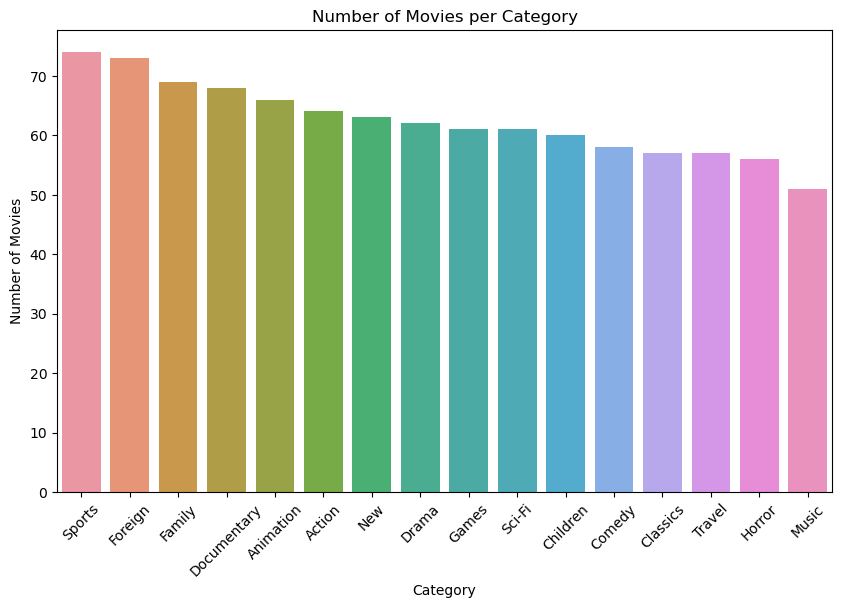

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=df4, x='category_name', y='movies_count')  
plt.xticks(rotation=45)
plt.title('Number of Movies per Category')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.show()

#### Visualize Average Rental Duration per Category

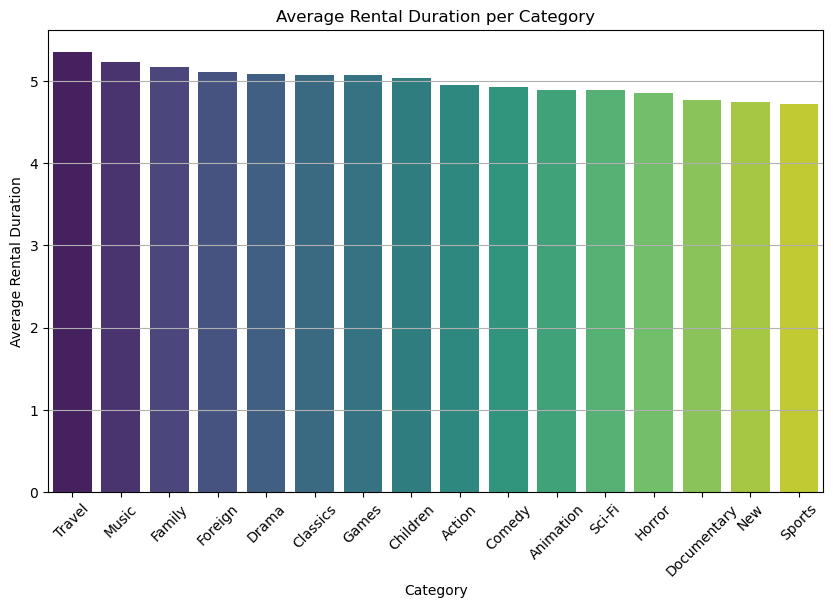

In [52]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create barplot
sns.barplot(data=df5, x='Category', y='avg_rental_duration', palette='viridis')

# Add titles and labels
plt.title('Average Rental Duration per Category')
plt.xlabel('Category')
plt.ylabel('Average Rental Duration')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Show the plot
plt.show()

#### Visualize Total Revenue Generated by Each Film

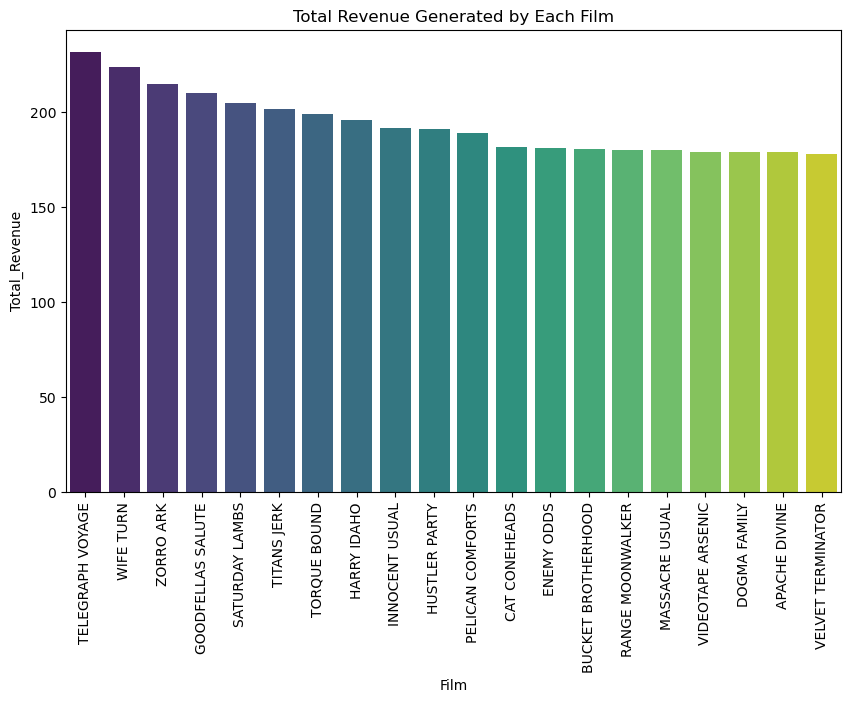

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=df6, x='Film', y='Total_Revenue', palette='viridis')
plt.title('Total Revenue Generated by Each Film')
plt.xlabel('Film')
plt.ylabel('Total_Revenue')
plt.xticks(rotation=90)
plt.show()

#### Visualize Top 5 Spenders (Customers)

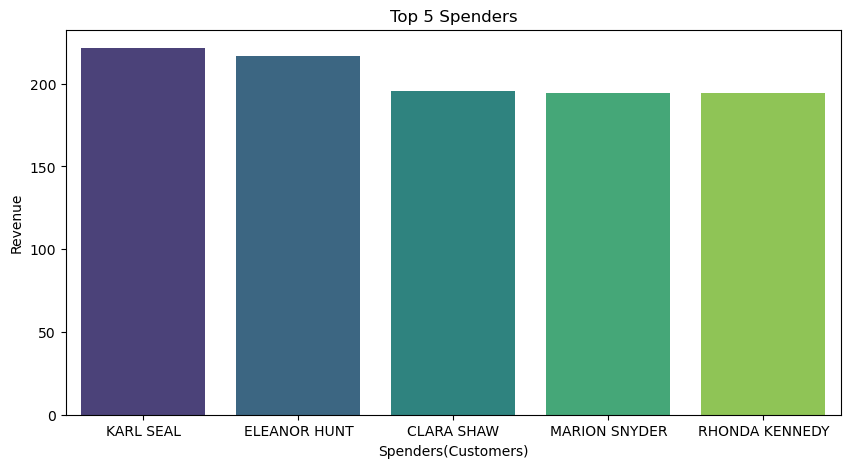

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=df7, x='Spenders', y='Revenue', palette='viridis')
plt.title('Top 5 Spenders')
plt.xlabel('Spenders(Customers)')
plt.ylabel('Revenue')
plt.show()

#### Visualize Monthly Revenue Trend

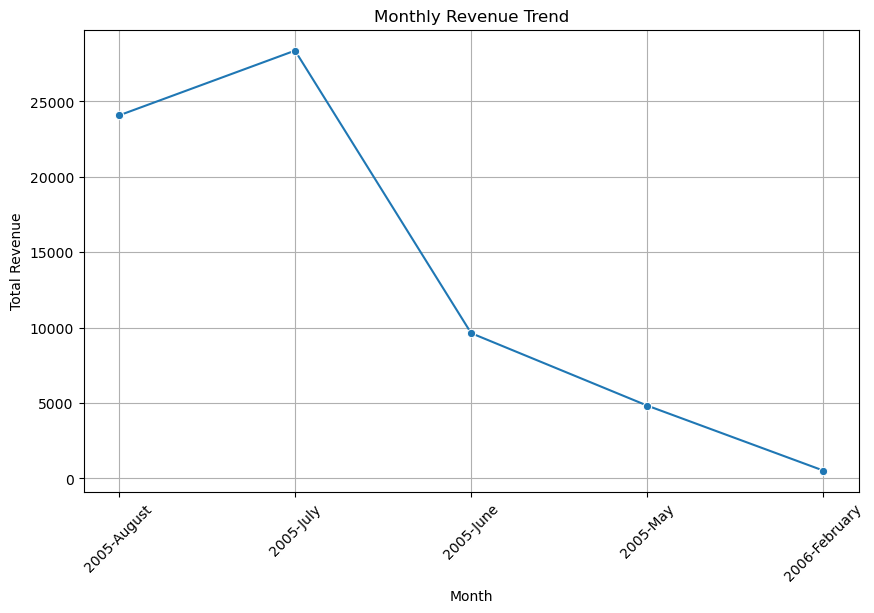

In [62]:
# Set figure size
plt.figure(figsize=(10,6))

# Line plot
sns.lineplot(data=df8, x='Month', y='Total_Revenue', marker='o')

# Titles and labels
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Visualize Active VS Inactive Customers

C:\Users\PMLS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


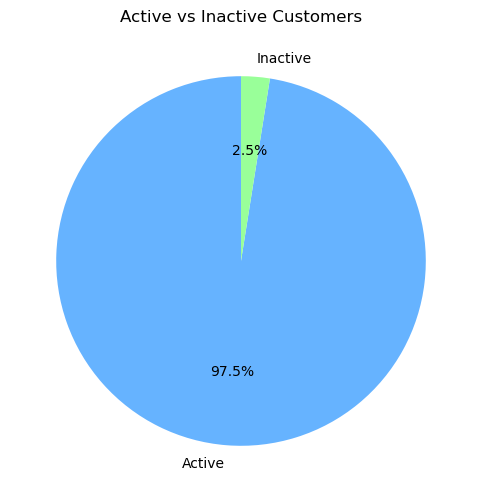

In [64]:
# Calculate the count of active and inactive customers
status_counts = df12.set_index('Status')['Customer_Count']

# Plotting a pie chart
plt.figure(figsize=(8,6))
status_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90, cmap='Set3')

# Titles and labels
plt.title('Active vs Inactive Customers')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie chart
plt.show()

#### Visualize Number Of Rentals Per Month

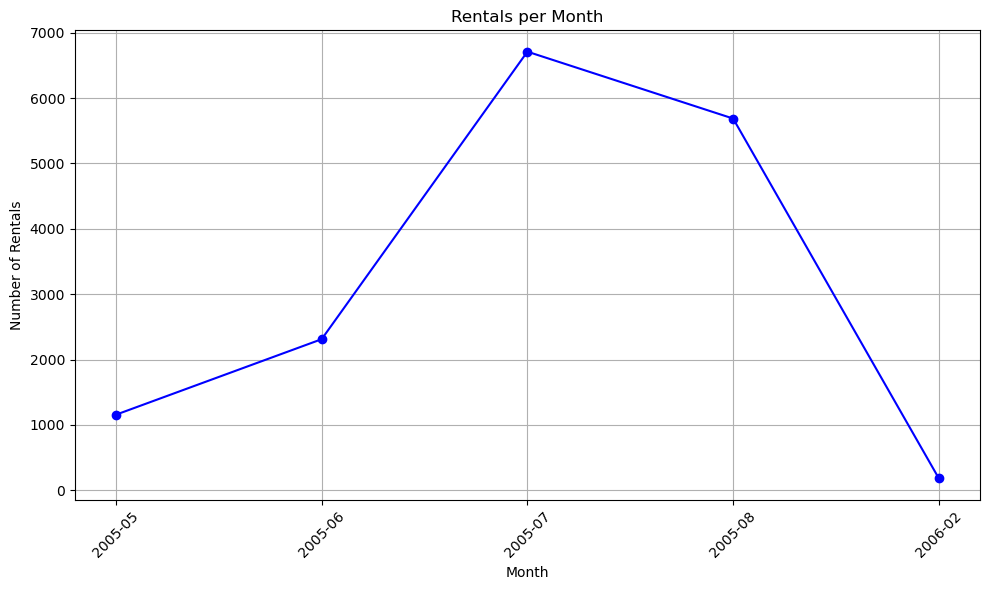

In [66]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df17['Month'], df17['Rental_Count'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

#### Visualize Peak Rental Hours

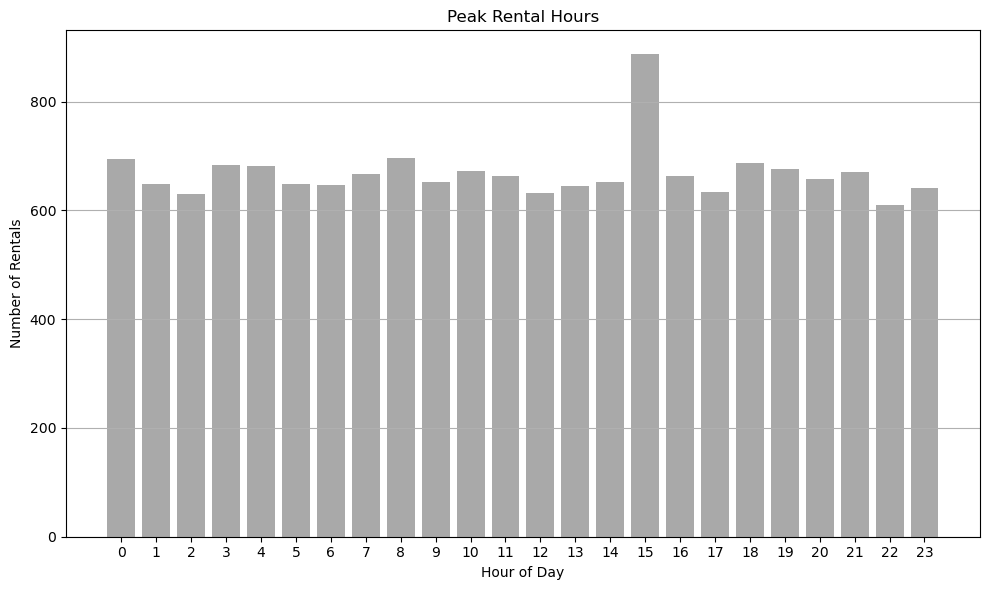

In [73]:
# Plotting a bar chart for peak rental hours
plt.figure(figsize=(10, 6))
plt.bar(df18['Rental_Hour'], df18['Rental_Count'], color='darkgrey')

# Adding titles and labels
plt.title('Peak Rental Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rentals')
plt.xticks(range(24))  # Ensure all hours (0-23) are displayed
plt.grid(axis='y')
plt.tight_layout()

plt.show()

#### Visualize Seasonal Trends In Rentals

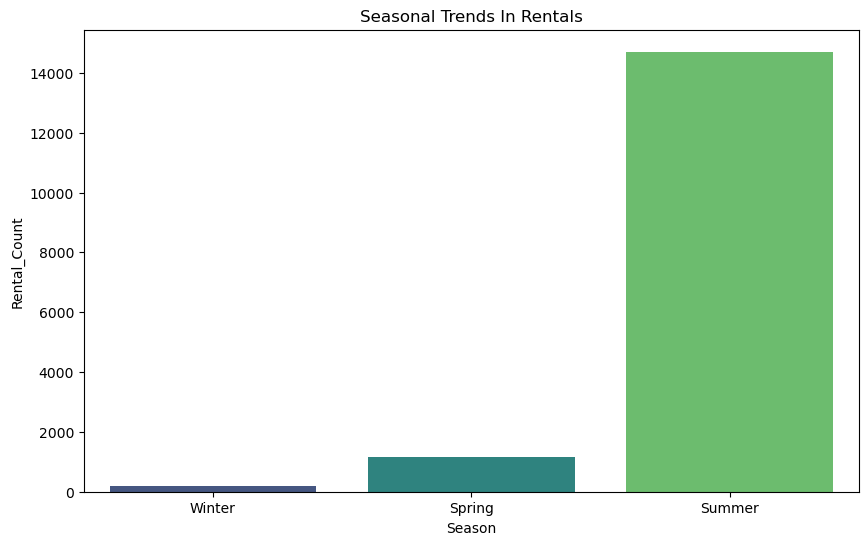

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(data=df19, x='Season', y='Rental_Count', palette='viridis')
plt.title('Seasonal Trends In Rentals')
plt.xlabel('Season')
plt.ylabel('Rental_Count')
plt.show()

# Final Observations:

### Top 10 Most Rented Films 
#### Insights:

- Top 10 Most Rented Films include ACADEMY DINOSAUR, ALONE TRIP, and ANONYMOUS HUMAN, showing strong customer interest in adventure and fantasy-themed movies.

- Most top-rented films have a rental price around $0.99, making them attractive and affordable for a wide audience.

- Keeping popular titles like ACADEMY DINOSAUR and ANONYMOUS HUMAN readily available can help maintain customer satisfaction and maximize rental revenues.

- Promotions focusing on similarly themed movies could further boost rentals and customer engagement.

### Movies Available in Most Stores
#### Insights:

- This query returns the top movies available in multiple stores. Each entry shows the movie title alongside the number of stores in which the movie is available.

- Based on the results, we can see that many movies, such as "ACADEMY DINOSAUR", "AFFAIR PREJUDICE", and "AGENT TRUMAN", are available in 2 stores.

- These movies appear to be highly distributed across the store network, suggesting that they may be popular or in high demand.

### Movies Count by Category
#### Insights:

- **Sports** has the highest number of movies, closely followed by **Foreign** and **Family** genres, with counts of 74, 73, and 69 respectively.

- **Music** has the lowest count of movies among all the categories with just 51 movies.

- It’s interesting to see the distribution of genres, with **Action**, **Drama**, and **Animation** categories also having a significant number of movies.
 
### Average Rental Duration per Movie Category
#### Insights:

- **Travel** movies have the highest average rental duration of approximately 5.35 days, suggesting that customers tend to rent travel-related films for a slightly longer period compared to others.

- **Music** and **Family** movies follow closely, with average rental durations of 5.24 and 5.17 days, respectively, which indicates a similar pattern of extended rentals.

- Genres such as **Sports** and **Action** movies have the lowest rental durations, averaging 4.72 and 4.95 days, respectively, which could indicate a preference for quicker, more action-packed content.

- The pattern across most categories seems to show that **documentaries** and **new releases** tend to be rented for shorter periods, with average durations below 5 days, possibly due to the fact that these films might not require as much rewatching or engagement as others.

### Total Revenue Generated by Each Film
#### Insights:

- Telegraph Voyage leads in revenue generation with 231.73, followed  closely by Wife Turn at 223.69.

- Several films, including Zorro Ark and Goodfellas Salute, consistently generate over 200, showing strong rental demand.

- Films at the lower end of the revenue spectrum, like Velvet Terminator and Apache Divine, still contribute significantly to overall earnings.

- The variation in revenue highlights diverse audience preferences and the profitability of different genres.

### Revenue by customers (Top 5 spenders)
#### Insights:

- Karl Seal is the top spender, with a total revenue of $221.55.

- Eleanor Hunt follows closely with $216.54, showing a strong customer demand.

- Clara Shaw, Marion Snyder, and Rhonda Kennedy are also significant contributors, each spending around $190 or more.

- These top 5 customers alone have contributed to a large portion of the overall revenue, highlighting the importance of retaining high-spending customers.

### Monthly revenue trend
#### Insights:

- The highest revenue was recorded in July 2005, with a total of $28,373.89.

- August 2005 also had significant revenue, $24,072.13, though lower than July.

- June 2005 showed a noticeable drop, with revenue falling to $9,631.88.

- A sharp decline is observed in May 2005 and February 2006, with revenues as low as $4,824.43 and $514.18, respectively.

- This suggests strong seasonal patterns, with some months performing significantly better than others, possibly due to factors like marketing campaigns or seasonal demand.

### Revenue By Store
#### Insights:

- Store with id 1 generated $33,489.47 in revenue.

- Store with id  2 had a slightly higher revenue at $33,927.04.

- Both stores show similar performance in terms of revenue generation, with a small difference of around $437.57 between them.

- This could suggest that both stores are performing relatively equally in terms of sales, and the difference in revenue could be attributed to factors such as location, customer traffic, or inventory variety.


### Number of rentals per customer.
#### Insights:

- Eleanor Hunt is the top renter, with a total of 46 rentals. Following closely are Karl Seal with 45 rentals and Clara Shaw with 42 rentals.

- The top 5 customers have rented movies extensively, with Marcia Dean, Tammy Sanders, and Sue Peters also making it to the list with 42, 41, and 40 rentals, respectively.

### Customers who haven’t rented anything in the last 3 months.
#### Insights:

- Aaron Selby and Adam Gooch are among the customers who have not rented any movies in the last 3 months.

- Other customers, such as Adrian Clary, Agnes Bishop, and Alan Kahn, also fall into this category.

- These customers represent a segment that may require engagement strategies to bring them back into the rental system, such as targeted promotions, personalized recommendations, or notifications about new content.

### Active vs Inactive customers
#### Insights:

- 584 Active customers and 15 Inactive customers were recorded in the dataset.

- The number of active customers significantly outweighs the inactive ones, indicating strong engagement with the rental platform.

- The low number of inactive customers could suggest that most users continue their engagement over time. However, there is still a small group of customers whose inactivity should be monitored and possibly re-engaged through marketing strategies or personalized outreach.

### Top 10 Active Customers
#### Insights:

- The top 10 active customers are highly engaged, with Eleanor Hunt leading with 46 rentals.

- These customers are responsible for a significant portion of the platform's rentals, indicating their high value.

- The list shows a relatively tight distribution among the top customers, with the top 10 customers having between 39 and 46 rentals.

- Strategies for customer retention could focus on these top users by offering loyalty programs or personalized offers to maintain their engagement and continue increasing their rental activity.

### Number of customers per country
#### Insights:

- India has the highest number of customers (60), followed by China (53) and the United States (36).

- Asian countries dominate the customer base, suggesting strong market presence in that region.

- Countries like Japan, Mexico, and Brazil also show notable customer counts, highlighting opportunities for targeted marketing.

### Total revenue per country.
#### Insights:

- India generated the highest revenue ($6,630.27), followed by China ($5,802.73) and the United States ($4,110.32).

- Asian countries contributed significantly to the overall revenue.

- Nigeria also appears among the top contributors, highlighting potential growth markets.

### Top cities by rentals.
#### Insights:

- Woodridge recorded the highest number of rentals (8,121), followed by Lethbridge with 7,923 rentals.

- These cities show a strong customer base and rental activity.

### Number of rentals per month.
#### Insights:

- The highest number of rentals occurred in July 2005 (6,709 rentals), followed by August 2005 (5,686 rentals).

- Rentals dropped significantly by February 2006 (182 rentals).

### Peak rental hours (using rental datetime).
#### Insights:

- The peak rental hour is 3 PM (15:00) with 887 rentals.

- Other active hours include 8 AM, 12 AM, and 6 PM.

### Seasonal trends in rentals.
#### Insights:

- Summer season had the highest number of rentals (14,706 rentals), showing peak activity.

- Spring saw moderate rentals (1,156 rentals).

- Winter experienced the least rentals (182 rentals).

### Staff & Store Insights:

- Mike Hillyer handled 8040 rentals, while Jon Stephens handled 8004 rentals — both performed almost equally.

- Jon Stephens generated slightly more revenue (33,927.04) than Mike Hillyer (33,489.47).

- Store with id 1 and Store with id 2 had almost equal rental counts, with 8040 and 8004 rentals respectively.

### Conclusion

***In this project, we performed a detailed analysis of movie rentals using SQL queries and Pandas.
Key business insights were extracted, including top-performing films, highest-spending customers, seasonal rental trends, and revenue distribution across stores and countries.
The analysis highlights customer behavior patterns, peak rental times, and active customer demographics, providing valuable guidance for inventory planning, marketing strategies, and customer retention efforts.
Overall, the findings can help drive data-informed decisions to optimize business performance.***